## Homework 3

### Jaewon Son / 2163284

---

#### **Q1. Regression Analysis**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

---

##### Q1.a
1. Load the data using Pandas and remove the unneeded attributes.
2. Handle missing values by imputing those values based on variable means.
3. Compute and display basic statistics for the variables in the data set.
4. Separate the target attribute for regression.
5. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data.

In [2]:
# Load the data
file_path = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 7\\Data File\\communities.csv"
communities = pd.read_csv(file_path)
communities.head(5)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
# Remove unneeded attributes
communities = communities.drop(columns = ['state', 'communityname'])
communities.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
# Handle missing values
communities.fillna(communities.mean(), inplace = True)

In [5]:
# Compute and display basic statistics
print(communities.describe())

        population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  1994.000000    1994.000000   1994.000000   1994.000000   1994.000000   
mean      0.057593       0.463395      0.179629      0.753716      0.153681   
std       0.126906       0.163717      0.253442      0.244039      0.208877   
min       0.000000       0.000000      0.000000      0.000000      0.000000   
25%       0.010000       0.350000      0.020000      0.630000      0.040000   
50%       0.020000       0.440000      0.060000      0.850000      0.070000   
75%       0.050000       0.540000      0.230000      0.940000      0.170000   
max       1.000000       1.000000      1.000000      1.000000      1.000000   

       racePctHisp  agePct12t21  agePct12t29  agePct16t24   agePct65up  ...  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean      0.144022     0.424218     0.493867     0.336264     0.423164  ...   
std       0.232492     0.155196     0.143564     0.

In [6]:
# Separate the target variable
feature_variable = communities.drop(columns = ['ViolentCrimesPerPop'])
target_variable = communities['ViolentCrimesPerPop']

In [7]:
# Divide into training and testing set
X_train, X_test, y_train, y_test = train_test_split(feature_variable, target_variable, test_size = 0.2, random_state = 33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1595, 97)
(399, 97)
(1595,)
(399,)


---

##### Q1.b
1. Perform standard multiple linear regression on data using the scikit-learn Linear Regression module.
2. Compute the RMSE values on the training data.
3. Plot the correlation between the predicted and actual values of the target attribute.
4. Display the obtained regression coefficients and plot them using Matplotlib.
5. Perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE.

In [8]:
# Fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training data
lr_train_predict = lr.predict(X_train)

# Compute RMSE for the training data
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_predict))
print(f"RMSE for the Training Set: {lr_train_rmse}")

RMSE for the Training Set: 0.12617273086682324


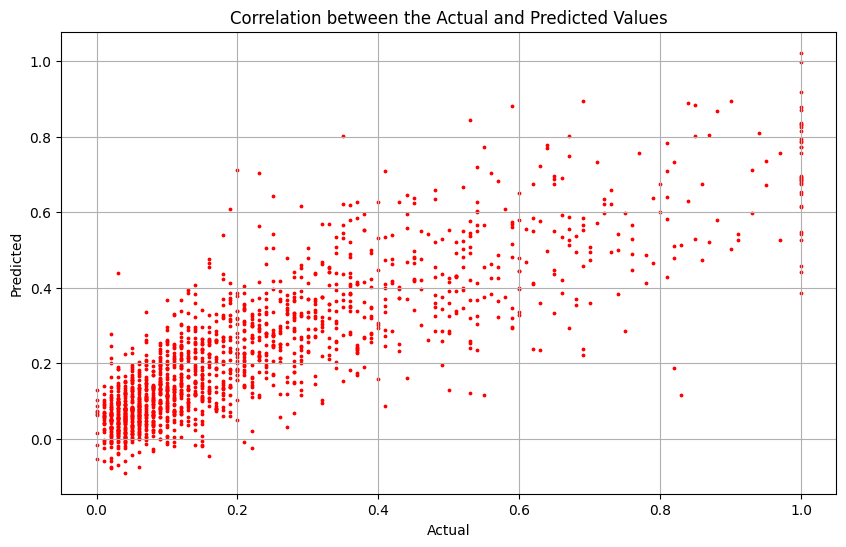

In [9]:
# Plot the correlation between predicted and actual values
plt.figure(figsize = (10, 6))
plt.scatter(y_train, lr_train_predict, color = 'red', s = 3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Correlation between the Actual and Predicted Values')
plt.grid()
plt.show()

In [10]:
# Display the obtained regression coefficients
feature_names = feature_variable.columns
coefficients = lr.coef_

print("Regression Coefficients:")
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

Regression Coefficients:
population: -0.008840221078268326
householdsize: -0.05284638152191937
racepctblack: 0.22154340032395528
racePctWhite: -0.050600187795349215
racePctAsian: -0.019702670385815788
racePctHisp: 0.048049176144505844
agePct12t21: 0.10161219307173358
agePct12t29: -0.17046353337624118
agePct16t24: -0.12537737348838415
agePct65up: 0.07160713455426362
numbUrban: -0.12407030421921875
pctUrban: 0.0387285574508557
medIncome: -0.20207206746523212
pctWWage: -0.21300115980748255
pctWFarmSelf: 0.042179712416820364
pctWInvInc: -0.07462050711501551
pctWSocSec: 0.012216529679412926
pctWPubAsst: 0.02265657322869942
pctWRetire: -0.09576999525273464
medFamInc: 0.3539647526079374
perCapInc: 0.07637677122485266
whitePerCap: -0.3525685207417012
blackPerCap: -0.029635767608523437
indianPerCap: -0.04169749480010049
AsianPerCap: 0.03346890525805473
OtherPerCap: 0.04955621838614854
HispPerCap: 0.03802370995248447
NumUnderPov: 0.2969693331750429
PctPopUnderPov: -0.23811276185082356
PctLess9th

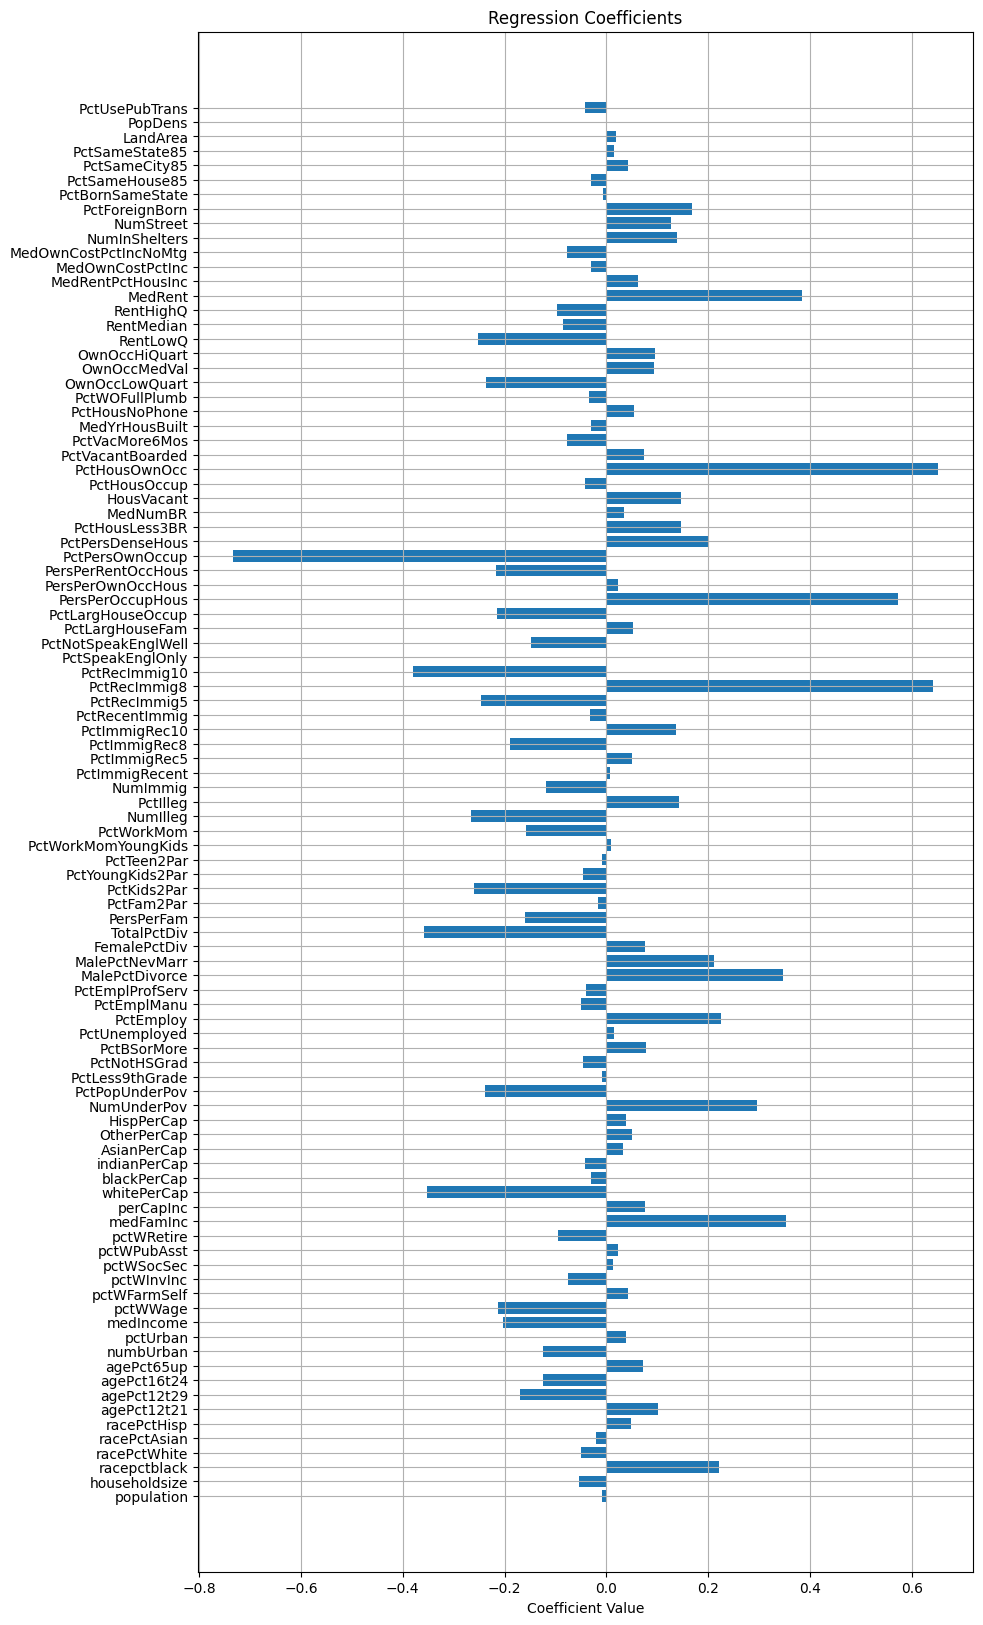

In [11]:
# Plot regression coefficients
plt.figure(figsize = (10, 20))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Regression Coefficients')
plt.grid()
plt.show()

In [12]:
# Define K-Fold
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 33)

# Initialize a list to store RMSE
lr_train_cv_rmse_list = []

# Perform 10-fold cross-validation
for train_index, test_index in k_fold.split(X_train):

    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the linear regression model
    lr.fit(X_train_cv, y_train_cv)

    # Make predictions on the training data
    lr_train_cv_predict = lr.predict(X_train_cv)

    # Calculate the RMSE
    lr_train_cv_rmse = np.sqrt(mean_squared_error(y_train_cv, lr_train_cv_predict))

    # Append the calculated RMSE to the list
    lr_train_cv_rmse_list.append(lr_train_cv_rmse)

In [13]:
# Compare the cross-validation RMSE to the training RMSE.
print(f"RMSE for the Training Set: {lr_train_rmse}")
print(f"Cross-Validation RMSE for the Training Set: {np.mean(lr_train_cv_rmse_list)}")

RMSE for the Training Set: 0.12617273086682324
Cross-Validation RMSE for the Training Set: 0.12567923594806635


---

##### Q1.c
1. Use the scikit-learn to select the best subset of features to perform linear regression.
2. For feature selection, write a script or function that takes as input the training data, target variable, the regression model, and any other parameters. The function should return the optimal percentage of the most informative features to use.
3. Use k-fold cross-validation on the training data and use feature_selection.SelectiPercentile to find the most informative variables for a range of percentile values.
4. Plot the model's error values on cross-validation using only the selected features across the range of percentile values.
5. Once identify the best percentile based on cross-validation, use it to 
identify and display the corresponding best features. 
6. Train the model on the training data with the optimal subset of features.
7. Compute its performance.

In [14]:
# Function for feature selection
def feature_selection(X_train, y_train, percentile):

    # Initialize the SelectPercentile object
    feature_selector = SelectPercentile(f_regression, percentile = percentile) 
    
    # Return a new training set with the selected features
    X_train_with_selected_features = feature_selector.fit_transform(X_train, y_train)

    return feature_selector, X_train_with_selected_features

In [15]:
# Function to compute cross_validation MAE
def cv_mae(X_train, y_train, model, k = 5):
    
    # Define K-Fold
    k_fold = KFold(n_splits = k, shuffle = True, random_state = 33)
    
    # Perform cross-validation and get negative MAE scores
    negative_mae_scores = cross_val_score(model, X_train, y_train, cv = k_fold, scoring = 'neg_mean_absolute_error')
    
    # Convert negative MAE scores to positive values
    positive_mae_scores = -(negative_mae_scores)

    # Calculate the mean
    mean_mae_scores = np.mean(positive_mae_scores)

    return mean_mae_scores

In [16]:
# Function to find the optimal percentile for feature selection
def find_optimal_percentile(X_train, y_train, model, percentiles = range(10, 101, 10), k = 5):
    
    # Initialize a list to store MAE
    mae_scores = []

    # Initialize the best MAE and its percentile
    best_mae = None
    best_percentile = None

    for percentile in percentiles:

        # Select features based on the current percentile
        feature_selector, X_train_with_selected_features = feature_selection(X_train, y_train, percentile)
        
        # Compute cross_validation MAE
        mean_mae_scores = cv_mae(X_train_with_selected_features, y_train, model, k)
        mae_scores.append(mean_mae_scores)

        # Update best MAE and percentile
        if best_mae is None or mean_mae_scores < best_mae:
            best_mae = mean_mae_scores
            best_percentile = percentile
    
    print(f"Best Percentile: {best_percentile}%")
    print(f"Best Cross-Validation MAE: {best_mae}")

    return mae_scores, best_percentile

In [17]:
# Function to visualize the results of MAE scores against percentiles
def visualize_mae_scores(percentiles, mae_scores):

    # Plot MAE scores against percentiles
    plt.figure(figsize = (10, 6))
    plt.plot(percentiles, mae_scores, marker = 'o')
    plt.xlabel('Percentile of Selected Features')
    plt.ylabel('Mean Absolute Error')
    plt.title('MAE for Different Percentiles of Selected Features')
    plt.grid(True)
    plt.show()

In [18]:
# Function to evaluate the model performance using the selected features
def evaluate_model_performance(X_train, X_test, y_train, y_test, model, best_percentile):
    
    # Select features based on the best percentile
    feature_selector, X_train_with_selected_features = feature_selection(X_train, y_train, best_percentile)
    
    # Return a new testing set with the selected features
    X_test_with_selected_features = feature_selector.transform(X_test)
    
    # Fit the model
    model.fit(X_train_with_selected_features, y_train)

    # Make predictions on the testing data
    model_test_predict = model.predict(X_test_with_selected_features)
    
    # Calculate the MAE
    model_test_mae = mean_absolute_error(y_test, model_test_predict)
    print(f"MAE for the Testing Set with Selected Features: {model_test_mae}")

    return feature_selector, model_test_mae

In [19]:
# Function to extract selected features
def extract_selected_features(feature_selector, feature_variable):
    
    # Determine which features were selected
    selected_features = np.array(feature_variable.columns)[feature_selector.get_support()]

    # Print selected features 
    print("Selected Features:")
    for feature in selected_features:
        print(feature)

In [20]:
# Find the optimal percentile
mae_scores, best_percentile = find_optimal_percentile(X_train, y_train, lr, k = 5)

Best Percentile: 40%
Best Cross-Validation MAE: 0.0955535508946717


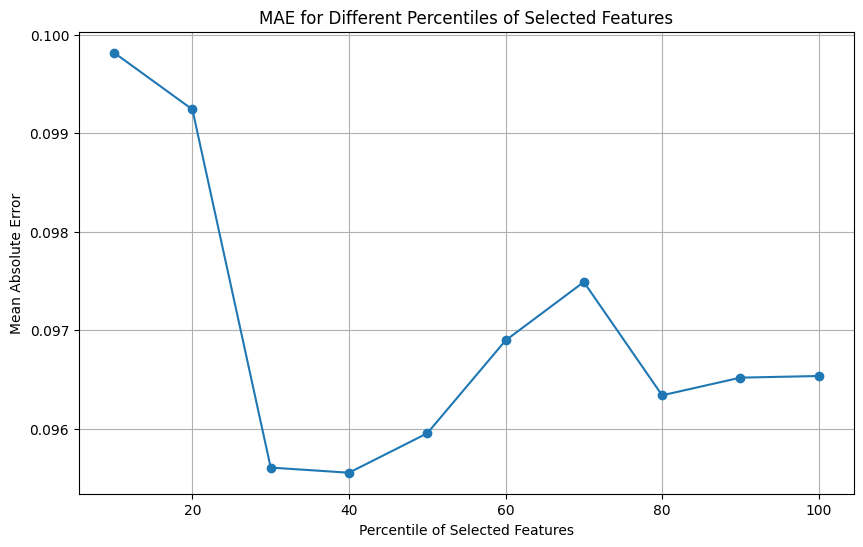

In [21]:
# Visualize the MAE scores against percentiles
visualize_mae_scores(range(10, 101, 10), mae_scores)

In [22]:
# Evaluate the model performance on the testing set using the selected features
feature_selector, model_test_mae = evaluate_model_performance(X_train, X_test, y_train, y_test, lr, best_percentile)

MAE for the Testing Set with Selected Features: 0.10154677049936843


In [23]:
# Extract and print selected features
selected_features = extract_selected_features(feature_selector, feature_variable)

Selected Features:
population
racepctblack
racePctWhite
numbUrban
medIncome
pctWInvInc
pctWPubAsst
medFamInc
perCapInc
NumUnderPov
PctPopUnderPov
PctLess9thGrade
PctNotHSGrad
PctBSorMore
PctUnemployed
PctEmploy
MalePctDivorce
FemalePctDiv
TotalPctDiv
PctFam2Par
PctKids2Par
PctYoungKids2Par
PctTeen2Par
NumIlleg
PctIlleg
PctLargHouseFam
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
MedNumBR
HousVacant
PctHousOccup
PctHousOwnOcc
PctVacantBoarded
PctHousNoPhone
PctWOFullPlumb
MedRentPctHousInc
NumInShelters
NumStreet


---

##### Q1.d
1. Using the original train and test data, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model.
2. In each case, perform systematic model selection to identify the optimal alpha hyperparameter. 
3. Create a function that takes as input the training data and target variable. The model selection process should perform k-fold cross validation.
4. Plot the error values on the training and cross-validation splits across the specified values of alpha.
5. Using the best alpha values for each regression model, train the model on the training data and evaluate it on the testing data.
6. Discuss observations and conclusions, especially about the impact of alpha on bias-variance trade-off. 

In [24]:
# Function to compute training RMSE
def train_rmse(X_train, y_train, model):

    # Initialize a list to store training RMSE
    model_train_rmse_list = []
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the training data
    model_train_predict = model.predict(X_train)

    # Calculate the RMSE
    model_train_rmse = np.sqrt(mean_squared_error(y_train, model_train_predict))
    model_train_rmse_list.append(model_train_rmse)

    return model_train_rmse_list

In [25]:
# Function to compute cross_validation MAE
def cv_rmse(X_train, y_train, model, k = 5):

    # Initialize a list to store cross-validation RMSE
    model_train_cv_rmse_list = []
    
    # Define K-Fold
    k_fold = KFold(n_splits = k, shuffle = True, random_state = 33)
    
    # Calculate the RMSE
    negative_mae_scores = cross_val_score(model, X_train, y_train, cv = k_fold, scoring = 'neg_mean_absolute_error')
    model_train_cv_rmse = np.sqrt(-negative_mae_scores.mean())
    model_train_cv_rmse_list.append(model_train_cv_rmse)

    return model_train_cv_rmse_list

In [26]:
# Function to plot RMSE across the alpha values
def plot_rmse(alphas, model_train_rmse_list, model_train_cv_rmse_list, model_name):

    # Plot RMSE values against alphas
    plt.figure(figsize = (10, 6))
    plt.plot(alphas, model_train_rmse_list, marker = 'o', label = 'Training RMSE')
    plt.plot(alphas, model_train_cv_rmse_list, marker = 'o', label = 'Cross-Validation RMSE')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title(f'{model_name} RMSE across the Alpha')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
# Function to perform alpha optimization
def alpha_optimization(X_train, y_train, model, alphas, k = 5):

    # Initialize lists to store the RMSE
    train_rmse_list = []
    cv_rmse_list = []

    for alpha in alphas:

        # Set the alpha parameter
        model.set_params(alpha = alpha)
        
        # Calculate training RMSE
        train_rmse_list.append(train_rmse(X_train, y_train, model)[0])
        
        # Calculate cross-validation RMSE
        cv_rmse_list.append(cv_rmse(X_train, y_train, model, k)[0])

    # Find the best alpha
    best_alpha_index = np.argmin(cv_rmse_list)
    best_alpha = alphas[best_alpha_index]

    return train_rmse_list, cv_rmse_list, best_alpha

In [28]:
# Set the alpha parameter
alphas = np.logspace(-6, 6, 13)

In [29]:
# Fit the ridge regression model
ridge = Ridge()

# Perform model selection to find the best alpha
ridge_train_rmse_list, ridge_cv_rmse_list, best_alpha_ridge = alpha_optimization(X_train, y_train, ridge, alphas)

# Set the best alpha parameter
ridge.set_params(alpha = best_alpha_ridge)

# Fit the ridge regression model
ridge.fit(X_train, y_train)

# Make predictions on the testing data
ridge_test_predict = ridge.predict(X_test)

# Calculate the RMSE
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_predict))

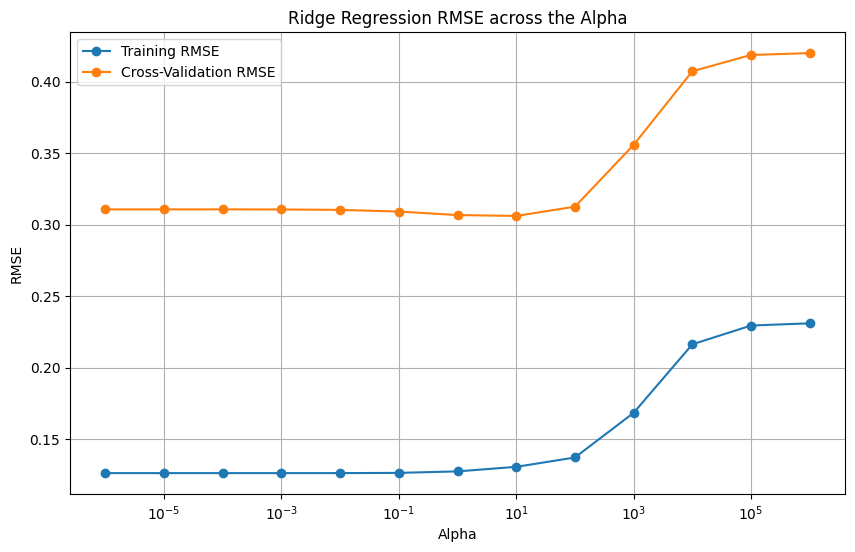

In [30]:
# Plot RMSE for Ridge
plot_rmse(alphas, ridge_train_rmse_list, ridge_cv_rmse_list, 'Ridge Regression')

In [31]:
# Display the best alpha and the corresponding RMSE
print(f"Best Alpha: {best_alpha_ridge}")
print(f"Ridge Regression RMSE with the Best Alpha: {ridge_test_rmse}")

Best Alpha: 10.0
Ridge Regression RMSE with the Best Alpha: 0.14539494901729613


In [32]:
# Fit the lasso regression model
lasso = Lasso()

# Perform model selection to find the best alpha
lasso_train_rmse_list, lasso_cv_rmse_list, best_alpha_lasso = alpha_optimization(X_train, y_train, lasso, alphas)

# Set the best alpha parameter
lasso.set_params(alpha = best_alpha_lasso)

# Fit the ridge regression model
lasso.fit(X_train, y_train)

# Make predictions on the testing data
lasso_test_predict = lasso.predict(X_test)

# Calculate the RMSE
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_predict))

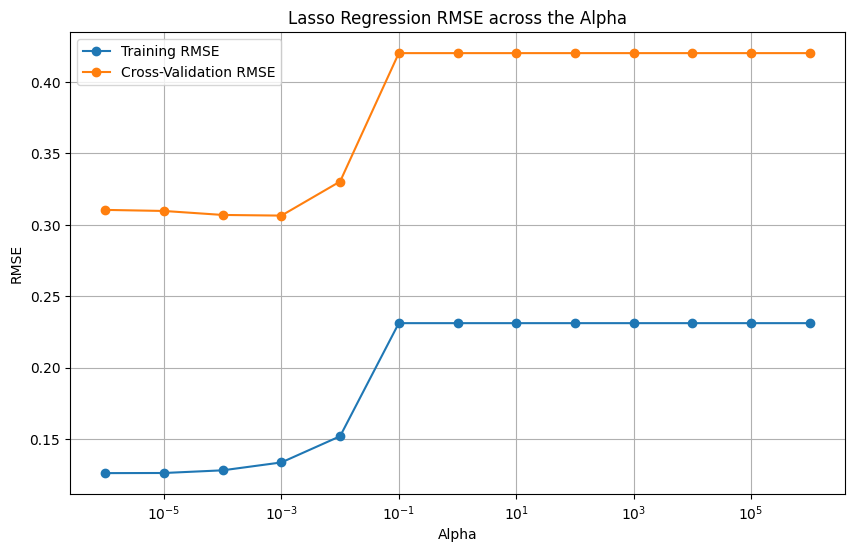

In [33]:
# Plot RMSE for Lasso
plot_rmse(alphas, lasso_train_rmse_list, lasso_cv_rmse_list, 'Lasso Regression')

In [34]:
# Display the best alpha and the corresponding RMSE
print(f"Best Alpha: {best_alpha_lasso}")
print(f"Ridge Regression RMSE with the Best Alpha: {lasso_test_rmse}")

Best Alpha: 0.001
Ridge Regression RMSE with the Best Alpha: 0.14600905991430388


When the alpha value is low, the model may overfit the training data, resulting in high variance and low bias due to weak regularization. In contrast, as the alpha value increases, the model may underfit, leading to lower variance and higher bias because of stronger regularization.

In this case, 10 and 0.001 are optimal for each Ridge and Lasso regressions alpha value because the gap between the Training RMSE and Cross-validation RMSE is minimized at the corresponding values.

---

##### Q1.e
1. Perform regression using Stochastic Gradient Descent Regressor from scikit-learn.
2. Prior to fitting the model, perform the scaling using StandardScaler from sklearn.preprocessing.
3. Perform a grid search using GridSearchCV from sklearn.grid_search. The grid search should compare combinations of two penalty parameters and different values of alpha.
4. Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores.
5. Finally, perform model optimization to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter.

In [35]:
# Function to standardize the training and testing sets
def standardize(X_train, X_test):

    # Initialize a StandardScaler
    scaler = StandardScaler()

    # Fit the scaler
    scaler.fit(X_train)

    # Apply the scaler to transform the training and testing sets
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [36]:
# Function to find the best parameters
def sgd_grid_search(X_train, y_train):

    # Initialize SGDRegressor
    sgd = SGDRegressor(random_state = 33)
    
    # Define the hyperparameter grid to search
    sgd_parameters = {'penalty': ['l1', 'l2'],
                      'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    
    # Set up the grid search
    sgd_grid_search = GridSearchCV(sgd, sgd_parameters)

    # Fit the model
    sgd_grid_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"Best parameters: {sgd_grid_search.best_params_}")

    return sgd_grid_search.best_estimator_

In [37]:
# Function to find the best parameters
def sgd_elastic_grid_search(X_train, y_train):

    # Initialize SGDRegressor
    sgd_elastic = SGDRegressor(penalty = 'elasticnet', random_state = 33)
    
    # Define the hyperparameter grid to search
    sgd_elastic_parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1],
                              'l1_ratio': np.linspace(0, 1, 10)}

    # Set up the grid search
    sgd_elastic_grid_search = GridSearchCV(sgd_elastic, sgd_elastic_parameters)

    # Fit the model
    sgd_elastic_grid_search.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best SGD - Elastic parameters: {sgd_elastic_grid_search.best_params_}")
    
    return sgd_elastic_grid_search.best_estimator_

In [38]:
# Function to evaluate model performance
def evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test):

    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the datasets
    model_train_predict = model.predict(X_train_scaled)
    model_test_predict = model.predict(X_test_scaled)
    
    # Calculate the RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, model_train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test, model_test_predict))
    
    # Display the RMSE
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")

In [39]:
# Standardize the training and testing sets
X_train_scaled, X_test_scaled = standardize(X_train, X_test)

In [40]:
# Display best parameters and evaluate the performance
best_sgd_model = sgd_grid_search(X_train_scaled, y_train)
evaluate_model(best_sgd_model, X_train_scaled, y_train, X_test_scaled, y_test)

Best parameters: {'alpha': 0.001, 'penalty': 'l1'}
Training RMSE: 0.13196026636632277
Testing RMSE: 0.14683470222595243


In [41]:
# Display best parameters and evaluate the performance
best_sgd_elastic_model = sgd_elastic_grid_search(X_train_scaled, y_train)
evaluate_model(best_sgd_elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

Best SGD - Elastic parameters: {'alpha': 0.01, 'l1_ratio': 0.3333333333333333}
Training RMSE: 0.13307086446169603
Testing RMSE: 0.1458859026833497


---

#### **Q2. Automatic Document Clustering**

In [42]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from wordcloud import WordCloud

---

##### Q2.a
1. Create distance function with Cosine Similarity.

In [43]:
# Function to calcualte Cosine Distance
def cosine_distance(vector1, vector2):
        
        # Calculate the dot product
        dot_product = np.dot(vector1, vector2)

        # Calculate the norm
        norm1 = np.linalg.norm(vector1)
        norm2 = np.linalg.norm(vector2)

        # Handle case where vector is zero
        if norm1 == 0 or norm2 == 0:
                return 1.0

        # Compute the cosine similarity
        cosine_similarity =  dot_product / (norm1 * norm2)

        # Convert Cosine Similarity to Cosine Distance
        cosine_distance = 1 - cosine_similarity 

        return cosine_distance

---

##### Q2.b
1. Load the data set.
2. Use the train_test_split function to perform a randomized split of the data set.
3. Perform TFxIDF transformation on the data sets.

In [44]:
# Define file path
classes_file_path = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 7\\Data File\\classes.txt"
matrix_file_path = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 7\\Data File\\matrix.txt"
terms_file_path = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 7\\Data File\\terms.txt"

# Load the data
classes = np.loadtxt(classes_file_path, dtype = int, usecols = 1, skiprows = 1)
matrix = np.loadtxt(matrix_file_path, delimiter = ',').T
terms = np.loadtxt(terms_file_path, dtype = str)

In [45]:
# Divide into training and testing set
X_train, X_test, y_train, y_test = train_test_split(matrix, classes, test_size = 0.2, random_state = 99)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 9328)
(500, 9328)
(2000,)
(500,)


In [46]:
# Transform to TF-IDF weights
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

---

##### Q2.c
1. Perform K-means clustering on the transformed training data.
2. Perform a qualitative analysis of the clusters by examining the top features in each cluster and identifying patterns in the data.
3. Write a function to display the top N terms in each cluster sorted by decreasing centroid weights for each term in the cluster. The output should also display the cluster DF value for the top N terms.
4. Display the cluster size for each cluster.
5. Use third-party tool or library, create a word cloud for each cluster.

In [47]:
# kMeans module of the MLA book
def randCent(dataSet, k):
     
	n = shape(dataSet)[1]
	centroids = zeros((k, n), dtype = float)
     
	for j in range(n):
          
		minJ = min(dataSet[:, j])
		rangeJ = float(max(dataSet[:, j]) - minJ)
		centroids[:, j] = minJ + rangeJ * random.rand(k)
          
	return centroids 

def kMeans(dataSet, k, distMeas = cosine_distance, createCent = randCent):

    m = shape(dataSet)[0]
    clusterAssment = zeros((m, 2))
    centroids = createCent(dataSet, k)
    clusterChanged = True

    while clusterChanged:

        clusterChanged = False

        for i in range(m):

            minDist = inf
            minIndex = -1

            for j in range(k):

                distJI = distMeas(centroids[j, :], dataSet[i, :])

                if distJI < minDist:
                    minDist = distJI
                    minIndex = j

            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True

            clusterAssment[i, :] = minIndex, minDist ** 2

        for cent in range(k):

            ptsInClust = dataSet[nonzero(clusterAssment[:, 0] == cent)[0]]

            if(len(ptsInClust) != 0):
                centroids[cent, :] = mean(ptsInClust, axis = 0)

    return centroids, clusterAssment

In [48]:
# Convert the matrix to a numpy array
np_array_X_train_tfidf = X_train_tfidf.toarray()
np_array_X_test_tfidf = X_test_tfidf.toarray()

In [49]:
# Function to perform K-means clustering
def k_means_clustering(dataset, k):
    
    cluster_results = {} # Initialize a dictionary to store results for each value of k
    centroids, clusterAssment = kMeans(dataset, k, cosine_distance, randCent) # Perform K-means clustering
    cluster_results = (centroids, clusterAssment) # Store the results in the dictionary

    return cluster_results

In [50]:
for k in range(4, 9):

    centroids, clusterAssment = k_means_clustering(np_array_X_train_tfidf, k) # Perform K-means clustering with the specified K value
    labels = clusterAssment[:, 0] # Extract cluster labels
    score = silhouette_score(np_array_X_train_tfidf, labels) # Calculate the silhouette score

    print(f"Silhouette Score for K = {k}: {score:.4f}")

Silhouette Score for K = 4: 0.0108
Silhouette Score for K = 5: 0.0137
Silhouette Score for K = 6: 0.0119
Silhouette Score for K = 7: 0.0120
Silhouette Score for K = 8: 0.0117


In [51]:
# Run clustering
centroids, clusterAssment = k_means_clustering(np_array_X_train_tfidf, 5)

In [52]:
def qualitative_analysis(centroids, clusterAssment, terms, n_top_terms):

    # Get the number of clusters and terms
    n_clusters = centroids.shape[0]
    n_terms = len(terms)
    
    for i in range(n_clusters):

        # Get the documents that belong to the current cluster
        cluster_docs = np_array_X_train_tfidf[clusterAssment[:, 0] == i]
        cluster_size = len(cluster_docs)
        
        cluster_df = np.sum(cluster_docs > 0, axis = 0) # Calculate document frequency for each term
        cluster_df_pct = (cluster_df / cluster_size) * 100 # Calculate percentage of documents containing each term
        
        # Get the centroid vector
        centroid_weights = centroids[i]
        
        # Identify the indices of terms with highest weights in the centroid
        top_indices = np.argsort(centroid_weights)
        top_indices = top_indices[top_indices < n_terms]
        top_indices = top_indices[-n_top_terms:][::-1]
        
        print()
        print("=" * 50)
        print(f"Cluster {i} (Size = {cluster_size})")
        print()
        print("Term\tFreq\tDF\t% of Docs")
        print("-" * 50)
        
        for idx in top_indices:
            term = str(terms[idx])
            freq = float(centroid_weights[idx])
            df = int(cluster_df[idx])
            pct_docs = float(cluster_df_pct[idx])
            print(f"{term}\t{freq:.4f}\t{df}\t{pct_docs:.1f}%")

        print("-" * 50)

In [53]:
# Run qualitative analysis
qualitative_analysis(centroids, clusterAssment, terms, 10)


Cluster 0 (Size = 408)

Term	Freq	DF	% of Docs
--------------------------------------------------
god	0.0717	225	55.1%
christian	0.0543	182	44.6%
sin	0.0326	84	20.6%
jesu	0.0310	111	27.2%
church	0.0298	96	23.5%
on	0.0288	226	55.4%
peopl	0.0281	182	44.6%
believ	0.0266	158	38.7%
bibl	0.0251	108	26.5%
hell	0.0232	42	10.3%
--------------------------------------------------

Cluster 1 (Size = 216)

Term	Freq	DF	% of Docs
--------------------------------------------------
david	0.0373	52	24.1%
netcomcom	0.0319	51	23.6%
sternlight	0.0302	40	18.5%
encrypt	0.0289	54	25.0%
write	0.0251	129	59.7%
subject	0.0244	216	100.0%
code	0.0244	42	19.4%
articl	0.0234	97	44.9%
govern	0.0210	43	19.9%
pgp	0.0202	34	15.7%
--------------------------------------------------

Cluster 2 (Size = 713)

Term	Freq	DF	% of Docs
--------------------------------------------------
window	0.0613	302	42.4%
sale	0.0374	218	30.6%
file	0.0338	158	22.2%
subject	0.0262	713	100.0%
driver	0.0252	88	12.3%
do	0.0249	144	20.2%
email	

In [54]:
def word_cloud_cluster(centroids, clusterAssment, terms, n_top_terms = 50):

    # Get the number of clusters and terms
    n_clusters = centroids.shape[0]
    n_terms = len(terms)

    for i in range(n_clusters):
        
        # Get the centroid vector
        centroid_weights = centroids[i]

        # Create dictionary of term-weight pairs
        word_freq = {str(terms[j]): float(centroid_weights[j]) for j in range(n_terms)}
        
        # Generate word cloud
        wordcloud = WordCloud(width = 800, 
                              height = 400,
                              background_color = 'white',
                              max_words = n_top_terms).generate_from_frequencies(word_freq)
        
        # Plot the word cloud
        plt.figure(figsize = (6, 4))
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.title(f'Cluster {i}')
        plt.axis('off')
        plt.show()

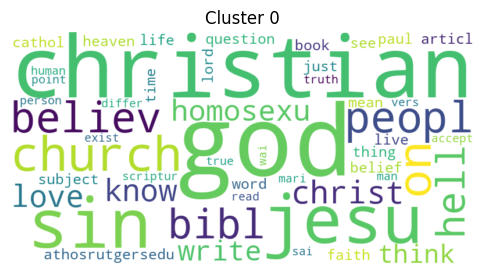

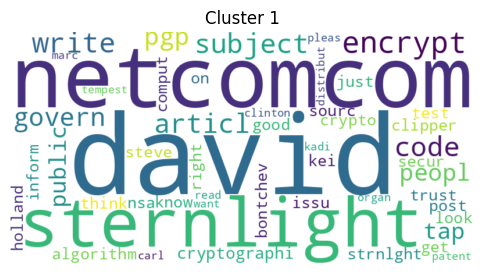

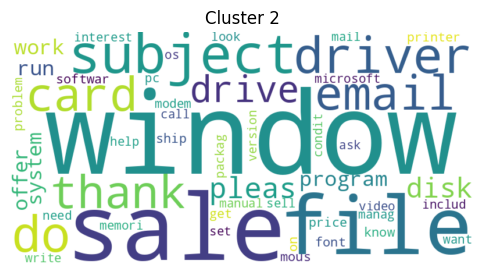

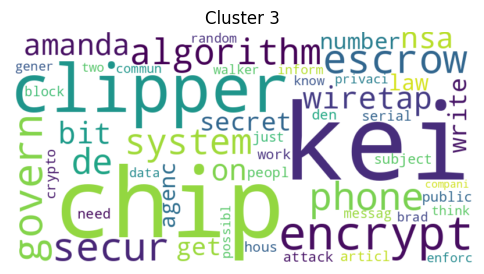

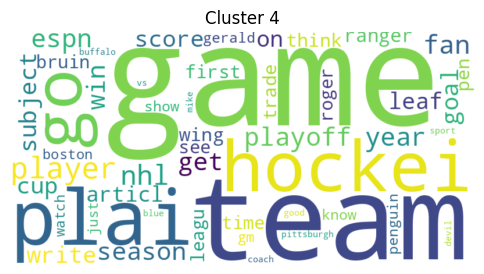

In [55]:
# Create word clouds
word_cloud_cluster(centroids, clusterAssment, terms, 50)

---

##### Q2.d
1. Using the cluster assignments from K-means clustering and the original cluster labels for the training document, compare clusters to the re-assigned classes by computing Completeness and Homogeneity values.
2. Try several other clustering runs each time with values of k ranging between 4 and 8 and in each case compute Completeness and Homogeneity.
3. Provide a brief report of experiment including a comparison of final results for at least three different runs.

In [56]:
predicted_labels = clusterAssment[:, 0] # Extract predicted cluster labels
homogeneity = homogeneity_score(y_train, predicted_labels) # Calculate the homogeneity score
completeness = completeness_score(y_train, predicted_labels) # Calculate the completeness score

print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")

Homogeneity Score: 0.6557
Completeness Score: 0.6946


In [57]:
def compute_completeness_homogeneity(n_runs = 3):

    # Initialize a dictionary to store results for each value of K
    results = {}
    
    for k in range(4, 9):
        
        print()
        print("=" * 50)
        print(f"Testing K = {k}")
        print("-" * 50)
        
        # Initialize a list to store results for each run for the current K
        k_results = []
        
        for run in range(n_runs):
            
            # Perform k-means clustering with the current K
            centroids, clusterAssment = k_means_clustering(np_array_X_train_tfidf, k)
            
            # Extract the predicted cluster labels
            predicted_labels = clusterAssment[:, 0]

            # Calculate homogeneity and completeness
            homogeneity = homogeneity_score(y_train, predicted_labels)
            completeness = completeness_score(y_train, predicted_labels)
            
            # Append to the list
            k_results.append({'run': run + 1,
                              'homogeneity': homogeneity,
                              'completeness': completeness})
            
            print()
            print(f"Run {run + 1}:")
            print(f"Homogeneity: {homogeneity:.4f}")
            print(f"Completeness: {completeness:.4f}")
            
        print("-" * 50)
        
        results[k] = k_results
    
    return results

In [58]:
# Run the experiment
results = compute_completeness_homogeneity(n_runs = 3)


Testing K = 4
--------------------------------------------------

Run 1:
Homogeneity: 0.6988
Completeness: 0.8421

Run 2:
Homogeneity: 0.6842
Completeness: 0.8135

Run 3:
Homogeneity: 0.6811
Completeness: 0.8186
--------------------------------------------------

Testing K = 5
--------------------------------------------------

Run 1:
Homogeneity: 0.8520
Completeness: 0.8520

Run 2:
Homogeneity: 0.8389
Completeness: 0.8391

Run 3:
Homogeneity: 0.8579
Completeness: 0.8579
--------------------------------------------------

Testing K = 6
--------------------------------------------------

Run 1:
Homogeneity: 0.8304
Completeness: 0.7633

Run 2:
Homogeneity: 0.8453
Completeness: 0.7786

Run 3:
Homogeneity: 0.7954
Completeness: 0.7345
--------------------------------------------------

Testing K = 7
--------------------------------------------------

Run 1:
Homogeneity: 0.7880
Completeness: 0.6656

Run 2:
Homogeneity: 0.8288
Completeness: 0.7193

Run 3:
Homogeneity: 0.8169
Completeness: 0.

Based on the result, we can figure out that the original categories are the best represented when clustering with k = 5. The Completeness and Homogeneity score has achieved the highest and the most balanced when the k = 5.

---

##### Q2.e
1. Using cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters. Categorization should be based on the Cosine similarity between each test document and cluster centroids. 
2. For each test document, show the assigned cluster label as well as Cosine Similarity to the corresponding cluster.

In [59]:
def document_categorization(np_array_X_test_tfidf, centroids):

     # Get the number of documents
    n_test_docs = np_array_X_test_tfidf.shape[0]

    for i in range(n_test_docs):

        doc = np_array_X_test_tfidf[i] # Current test document to be categorized
        best_cluster = -1  # Initialize best cluster index
        best_similarity = -1  # Initialize best similarity score
        
        for j in range(centroids.shape[0]):
            
            # Calculate cosine similarity with each centroid
            similarity = 1 - cosine_distance(doc, centroids[j])
            
            # Update best cluster
            if similarity > best_similarity:
                best_similarity = similarity
                best_cluster = j
        
        print(f"Doc {i} | Cluster {best_cluster} | Cosine Similarity: {best_similarity:.4f}")

In [60]:
# Categorize test documents
test_assignments = document_categorization(np_array_X_test_tfidf, centroids)

Doc 0 | Cluster 1 | Cosine Similarity: 0.3152
Doc 1 | Cluster 1 | Cosine Similarity: 0.2055
Doc 2 | Cluster 2 | Cosine Similarity: 0.2081
Doc 3 | Cluster 3 | Cosine Similarity: 0.1519
Doc 4 | Cluster 0 | Cosine Similarity: 0.3325
Doc 5 | Cluster 4 | Cosine Similarity: 0.3064
Doc 6 | Cluster 0 | Cosine Similarity: 0.3518
Doc 7 | Cluster 0 | Cosine Similarity: 0.1696
Doc 8 | Cluster 4 | Cosine Similarity: 0.2365
Doc 9 | Cluster 0 | Cosine Similarity: 0.3167
Doc 10 | Cluster 4 | Cosine Similarity: 0.2793
Doc 11 | Cluster 2 | Cosine Similarity: 0.0502
Doc 12 | Cluster 4 | Cosine Similarity: 0.2697
Doc 13 | Cluster 4 | Cosine Similarity: 0.2127
Doc 14 | Cluster 0 | Cosine Similarity: 0.3063
Doc 15 | Cluster 0 | Cosine Similarity: 0.0599
Doc 16 | Cluster 4 | Cosine Similarity: 0.1899
Doc 17 | Cluster 0 | Cosine Similarity: 0.3218
Doc 18 | Cluster 3 | Cosine Similarity: 0.2702
Doc 19 | Cluster 2 | Cosine Similarity: 0.1708
Doc 20 | Cluster 2 | Cosine Similarity: 0.1256
Doc 21 | Cluster 2 | Co

---